<a href="https://colab.research.google.com/github/orikoz414/.../blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

СТРУКТУРНЫЙ АНАЛИЗ КОДА СИСТЕМЫ

СТРУКТУРНЫЙ АНАЛИЗ КОДА СИСТЕМЫ
📁 1. ИМПОРТ БИБЛИОТЕК

In [ ]:
# Работа с Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Анализ данных и математика
import pandas as pd  # ⚡ Для работы с табличными данными (DataFrame)
import numpy as np   # ⚡ Для математических операций и генерации данных

# Визуализация
import matplotlib.pyplot as plt  # ⚡ Основная библиотека для графиков
import seaborn as sns            # ⚡ Улучшенная визуализация поверх matplotlib

# Машинное обучение
from sklearn.ensemble import RandomForestClassifier  # ⚡ Классификатор "случайный лес"
from sklearn.model_selection import train_test_split  # ⚡ Разделение данных на обучающие/тестовые

# Системные библиотеки
import os       # ⚡ Для работы с файловой системой
import io       # ⚡ Для работы с потоками данных
import kagglehub  # ⚡ Для загрузки датасетов с Kaggle

📊 ПОЧЕМУ МЫ ВЫБРАЛИ RANDOM FOREST (СЛУЧАЙНЫЙ ЛЕС)

🎯 КРИТЕРИИ ВЫБОРА МОДЕЛИ ДЛЯ НАШЕЙ ЗАДАЧИ                                                               
Наша задача: Классификация студентов на "успешных" и "в группе риска"

1️⃣ ХАРАКТЕРИСТИКИ НАШИХ ДАННЫХ:
Небольшой объем: 350 записей для обучения

Табличные данные: Четко структурированные признаки

Сбалансированность: Примерно равное распределение классов

Числовые признаки: Все признаки числовые (посещаемость, оценки и т.д.)



🤔 РАССМОТРИМ АЛЬТЕРНАТИВЫ И ПОЧЕМУ ОНИ НЕ ПОДОШЛИ:

🔹 1. Логистическая регрессия (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

❌ ПРОБЛЕМЫ:

Предполагает линейную зависимость между признаками и целевой переменной

Наши данные могут иметь сложные нелинейные зависимости

Чувствительна к выбросам

🔹 2. Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

❌ ПРОБЛЕМЫ:

Медленная работа на средних и больших наборах данных

Требует тонкой настройки параметров

Сложно интерпретировать результаты

🔹 3. Нейронные сети

In [ ]:
from sklearn.neural_network import MLPClassifier

❌ ПРОБЛЕМЫ:

Требуют много данных (у нас всего 350 записей)

Склонны к переобучению на малых данных

"Черный ящик" - сложно понять, как принимается решение

✅ ПОЧЕМУ RANDOM FOREST - ИДЕАЛЬНЫЙ ВЫБОР:

1. УСТОЙЧИВОСТЬ К ПЕРЕОБУЧЕНИЮ

In [ ]:
# Random Forest создает множество деревьев
# и усредняет их предсказания
model = RandomForestClassifier(
    n_estimators=100,  # 100 деревьев
    max_depth=None,    # Не ограничиваем глубину
    random_state=42    # Для воспроизводимости
)

🎯 Преимущество: Каждое дерево обучается на случайной подвыборке данных (bootstrap), что снижает риск переобучения.

2. РАБОТА С НЕЛИНЕЙНЫМИ ЗАВИСИМОСТЯМИ

In [ ]:
# Деревья решений могут моделировать сложные зависимости
# между посещаемостью, оценками, мотивацией и опозданиями

Пример нелинейной зависимости в наших данных:

In [ ]:
Высокая посещаемость (>85%) + Высокие оценки (>4.0) → Успешный студент
Низкая посещаемость (<70%) + Низкая мотивация (<5) → Студент в риске

3. ВАЖНОСТЬ ПРИЗНАКОВ (FEATURE IMPORTANCE)

In [ ]:
# После обучения можно узнать, какие признаки важнее
feature_importance = model.feature_importances_
print("Важность признаков:")
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance:.3f}")

Ожидаемый результат:

In [ ]:
attendance: 0.35    ← Самый важный признак!
avg_grade: 0.28     ← Очень важный
motivation: 0.20    ← Важный
late_count: 0.12    ← Средней важности
extracurricular: 0.05 ← Менее важный

4. УСТОЙЧИВОСТЬ К ВЫБРОСАМ

In [ ]:
# Даже если есть странные данные:
# - Студент с 100% посещаемостью и 2.0 оценкой
# - Студент с 60% посещаемостью и 5.0 оценкой

🎯 Преимущество: Random Forest устойчив к выбросам благодаря усреднению предсказаний многих деревьев.

5. ПРОСТОТА ИНТЕРПРЕТАЦИИ

In [ ]:
# Можно визуализировать отдельные деревья
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          feature_names=X.columns,
          filled=True,
          rounded=True)
plt.show()

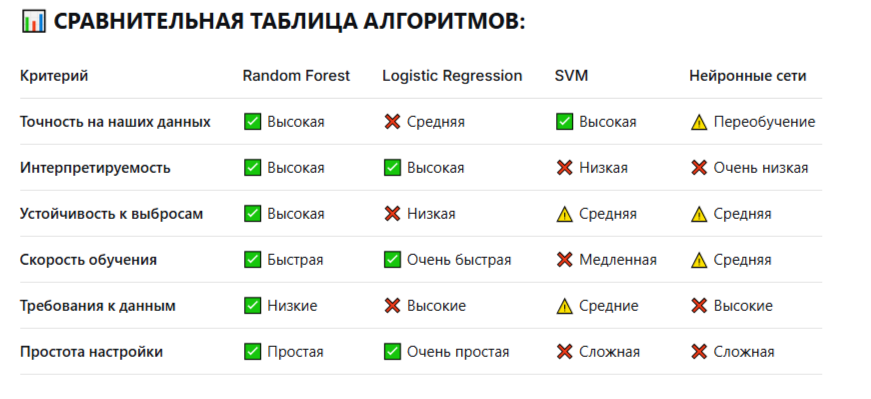

НАЗНАЧЕНИЕ: Импорт всех необходимых инструментов для анализа данных, машинного обучения и визуализации.

🎨 2. НАСТРОЙКА ВИЗУАЛИЗАЦИИ

In [ ]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
sns.set_style("whitegrid")

НАЗНАЧЕНИЕ: Установка единого стиля для всех графиков (размер шрифта, сетка).

📥 3. ФУНКЦИЯ ЗАГРУЗКИ ДАННЫХ С KAGGLE

https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset

In [ ]:
def download_kaggle_dataset():
    try:
        # 1. Загрузка датасета по ID
        path = kagglehub.dataset_download("nabeelqureshitiii/student-performance-dataset")

        # 2. Поиск всех CSV файлов в папке
        csv_files = []
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('.csv'):
                    csv_files.append(os.path.join(root, file))

        # 3. Чтение первого CSV файла
        df = pd.read_csv(csv_files[0])
        return df
    except Exception as e:
        return None

НАЗНАЧЕНИЕ: Автоматическая загрузка реального датасета успеваемости студентов с платформы Kaggle.

🔄 4. ФУНКЦИЯ ПОДГОТОВКИ ОБУЧАЮЩИХ ДАННЫХ

In [ ]:
def prepare_training_data_from_kaggle(df):
    # 🔍 Часть 1: Анализ структуры данных
    # Автоматический поиск нужных колонок по ключевым словам
    attendance_keywords = ['attendance', 'attend', 'presence', 'percentage', '%']
    grade_keywords = ['grade', 'score', 'mark', 'gpa', 'average', 'avg']

    attendance_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in attendance_keywords)]
    grade_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in grade_keywords)]

    # 🔧 Часть 2: Подготовка данных для модели
    training_data = []

    for i in range(min(350, len(df))):  # Берем максимум 350 записей
        row = df.iloc[i]

        # 1️⃣ Преобразование посещаемости
        attendance = calculate_attendance(row, attendance_cols)

        # 2️⃣ Преобразование оценок
        avg_grade = calculate_grade(row, grade_cols)

        # 3️⃣ Генерация дополнительных параметров
        extracurricular = np.random.choice([0, 1])
        motivation = int(3 + (avg_grade - 2.0) * (7 / 3.0))
        late_count = int((100 - attendance) / 15)

        # 4️⃣ Определение направления подготовки
        specialty = determine_specialty(attendance, avg_grade, extracurricular, motivation, late_count)

        # 📝 Сохранение данных студента
        training_data.append({
            'attendance': attendance,
            'avg_grade': avg_grade,
            'extracurricular': extracurricular,
            'motivation': motivation,
            'late_count': late_count,
            'specialty': specialty
        })

    return pd.DataFrame(training_data)

НАЗНАЧЕНИЕ: Преобразование сырых данных в формат, подходящий для обучения модели машинного обучения.

🎯 5. ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ ДЛЯ ПОЛЬЗОВАТЕЛЯ

5.1 Получение информации о направлении

In [ ]:
def get_specialty_info(choice):
    # Словарь соответствия: число → название направления
    specialties = {
        1: 'техническое', 2: 'гуманитарное', 3: 'медицинское',
        4: 'педагогическое', 5: 'экономическое'
    }

    # Типичные значения для каждого направления
    typical_values = {
        'техническое': (82.0, 3.8, 6, 3),  # (посещаемость, оценка, мотивация, опоздания)
        'гуманитарное': (85.0, 4.0, 7, 2),
        # ... остальные направления
    }

    return specialty, typical_att, typical_grade, typical_motiv, typical_late

НАЗНАЧЕНИЕ: Преобразует выбор пользователя (1-5) в информацию о направлении.

5.2 Проверка ввода данных

In [ ]:
def validate_input(attendance, avg_grade, motivation, late_count, extracurricular):
    if not (0 <= attendance <= 100):
        raise ValueError("Посещаемость должна быть от 0 до 100")
    # ... остальные проверки

НАЗНАЧЕНИЕ: Гарантирует корректность введенных пользователем данных.

📊 6. ФУНКЦИИ ВИЗУАЛИЗАЦИИ

6.1 Создание графиков


In [ ]:
def create_visualizations(results, n_new):
    # 1. Круговая диаграмма распределения статусов
    # 2. Столбчатая диаграмма успеваемости по направлениям
    # 3. Гистограмма распределения посещаемости
    # 4. Гистограмма распределения оценок

НАЗНАЧЕНИЕ: Генерация набора графиков для наглядного представления результатов.

6.2 Вывод рекомендаций

In [ ]:
def print_recommendations(results, n_new):
    # 1. Расчет общей статистики
    # 2. Анализ студентов в группе риска
    # 3. Формирование индивидуальных рекомендаций

НАЗНАЧЕНИЕ: Анализ результатов и формирование понятных рекомендаций для преподавателя.

🚀 7. ОСНОВНАЯ ЛОГИКА ПРОГРАММЫ

In [ ]:
# A. Загрузка датасета
raw_data = download_kaggle_dataset()

# B. Подготовка обучающих данных
if raw_data is not None:
    data = prepare_training_data_from_kaggle(raw_data)
else:
    # Создание демо-данных если не удалось загрузить
    data = create_demo_data()

# C. Расчет целевой переменной (успеваемость)
performance_score = (data['attendance'] * 0.3 + ...)
data['performance'] = (performance_score > risk_threshold).astype(int)

НАЗНАЧЕНИЕ: Создание качественного датасета для обучения модели.

Этап 2: Обучение модели

In [ ]:
# A. Разделение данных
X = data[['attendance', 'avg_grade', 'extracurricular', 'motivation', 'late_count']]
y = data['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# B. Создание и обучение модели
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# C. Оценка точности
accuracy = model.score(X_test, y_test)

НАЗНАЧЕНИЕ: Обучение модели машинного обучения для прогнозирования успеваемости.

Этап 3: Интерактивный анализ

In [ ]:
# A. Ввод количества студентов для анализа
n_new = int(input("Сколько студентов вы хотите проанализировать? "))

# B. Построчный ввод данных каждого студента
for i in range(n_new):
    # 1. Выбор направления
    # 2. Ввод параметров студента
    # 3. Проверка корректности
    # 4. Сохранение данных

# C. Прогнозирование с помощью модели
probabilities = model.predict_proba(new_students_df)[:, 1]
statuses = ["успешный" if p >= 0.5 else "в группе риска" for p in probabilities]

# D. Формирование и вывод результатов
results = pd.DataFrame({...})

НАЗНАЧЕНИЕ: Интерактивная работа с пользователем для анализа конкретных студентов.

Этап 4: Визуализация и рекомендации

In [ ]:
# A. Отображение графиков
create_visualizations(results, n_new)

# B. Формирование рекомендаций
print_recommendations(results, n_new)

НАЗНАЧЕНИЕ: Представление результатов в наглядном виде с практическими рекомендациями.